In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Preparation for Machine Learning

In [39]:
df = pd.read_csv("../real_estate.csv")
df.dropna(inplace=True)
df["publication_date"] = pd.to_datetime(df["publication_date"], format="mixed")

# Creation of an additional sign from publication_date
df["publication_month"] = df["publication_date"].dt.month
df["publication_day"] = df["publication_date"].dt.day
df["publication_year"] = df["publication_date"].dt.year

df.drop(columns=["publication_date"], inplace=True) # deleting redundant column
df.head()

,address,type,area,price,number_of_rooms,renovation,publication_month,publication_day,publication_year
0,ЖК Millennium Eco Apartments,Квартира,57.0,51700.0,2.0,без ремонту,12,28,2023
1,вул. Незалежності,Квартира,69.2,83000.0,2.0,з ремонтом,2,15,2024
3,вул. Княгинин,Квартира,42.0,36000.0,1.0,без ремонту,4,22,2024
4,"вул. Мазепи, 175а",Квартира,42.0,31100.0,1.0,без ремонту,9,21,2023
5,вул. Мельничука,Квартира,98.0,112600.0,3.0,з ремонтом,1,14,2024


In [40]:
# Convert categorical(str) variables into indicator variables.
df = pd.get_dummies(df, columns=["renovation"])

# a set of signs (features) that are used to predict the price of real estate
x = df[["area", "number_of_rooms", "publication_year", "publication_day", "publication_month", "renovation_без ремонту", "renovation_з ремонтом"]]

# target variable
y = df["price"]

# Separation of data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Model initialization and training
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions
predictions = model.predict(x_test)

# Checking model accuracy
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1166953726.6122365


As we can see, Mean Squared Error is pretty high, so we still not enough data for a qualitative prediction

# Making plot for comparing Actual and Predicted Prices

252028.1081429366


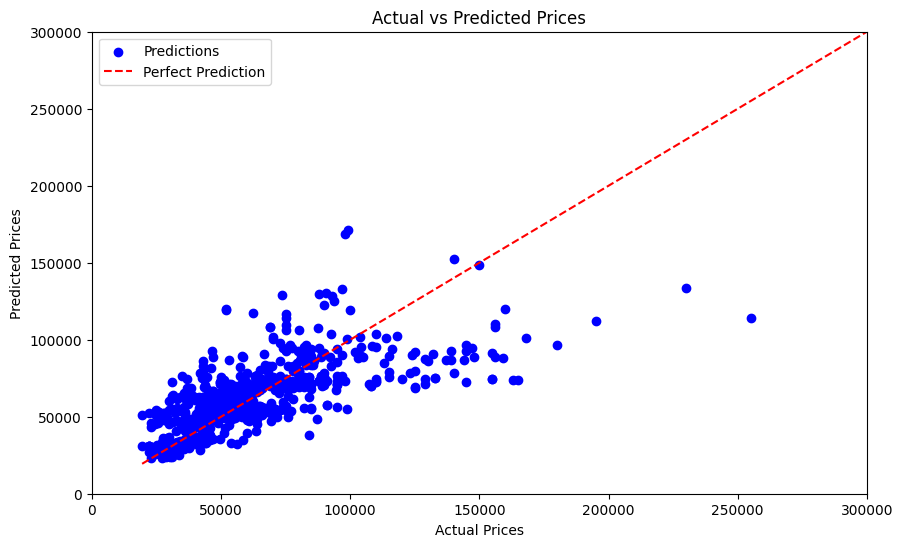

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.xlim([0, 300_000])
plt.ylabel("Predicted Prices")
plt.ylim([0, 300_000])
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

# Unfortunately, the current model is not ready for predictions due to my lack of experience in machine learning. However, I assure you that I will deepen my knowledge in this field and will be able to easily perform such tasks.